PASOS QUE TENEMOS QUE SEGUIR PARA LLEVARLO A CABO ANALISIS EXPLORATORIO DATOS EDA:


- Paso 1: Planteamiento del problema y recopilación de datos
- Paso 2: Exploración y limpieza de datos
- Paso 3: Análisis de variables univariante
- Paso 4: Análisis de variables multivariante
- Paso 5: Ingeniería de características
- Paso 6: Selección de características

Tras la implementación y adopción de estos pasos, estaremos preparados para entrenar el modelo.

_______________________________________________________

In [1]:
# Example importing the CSV here
import pandas as pd 

dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
dataframe

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# Paso 2: Exploración y limpieza de datos

In [2]:
# Obtener las dimensiones
dataframe.shape

(48895, 16)

Conclusiones:

- Hay 48895 registros en el DataFrame y 16 columnas



In [3]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#Eliminar duplicados
if dataframe.duplicated().sum() > 0:
    dataframe = dataframe.drop_duplicates()

In [6]:
#comprobar q se han eliminado duplicados

dataframe.duplicated().sum()

0

In [7]:
#Eliminar información irrelevante
dataframe.drop(["id", "host_id", "host_name", "last_review", "reviews_per_month", "name"], axis = 1, inplace = True)
dataframe.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


### Paso 3: Análisis de variables univariante

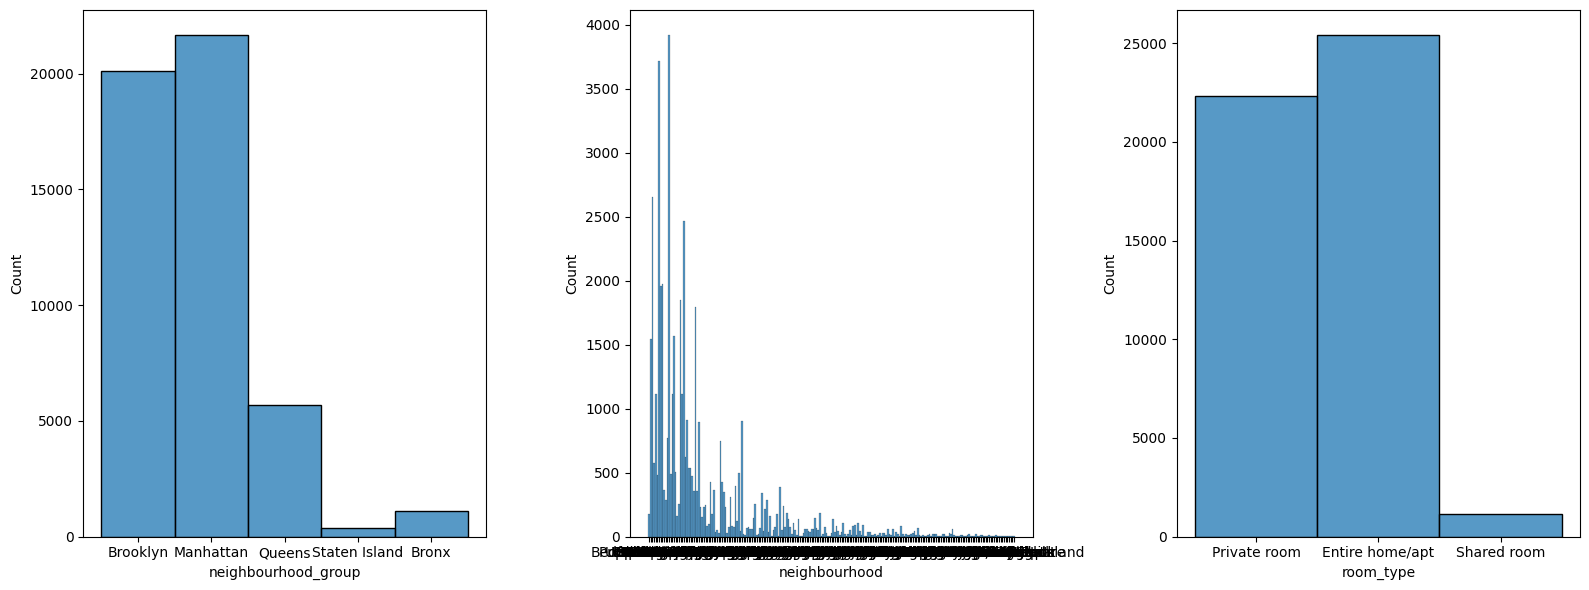

In [8]:
#Análisis sobre variables categóricas

import matplotlib.pyplot as plt 
import seaborn as sns

# Crear lienzo del gráfico
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Crear histogramas
sns.histplot(ax=axes[0], data=dataframe, x='neighbourhood_group')
sns.histplot(ax=axes[1], data=dataframe, x='neighbourhood')
sns.histplot(ax=axes[2], data=dataframe, x='room_type')

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Conclusiones

- Histograma de 'neighbourhood_group': Muesttra la distribución de los grupos de vecindarios. Cada barra en el gráfico correspondería a un grupo de vecindario y muestra la cantidad de propiedades en cada grupo. Nos una idea de la distribución geográfica de las propiedades en los diferentes grupos de vecindarios.
- Histograma de 'neighbourhood': Muestra el vecindario.
- Histograma de 'number_of_reviews': Muestra la distribución de la cantidad de opiniones para las propiedades y se muestra la frecuencia de las revisiones sin mostrar los valores exactos.


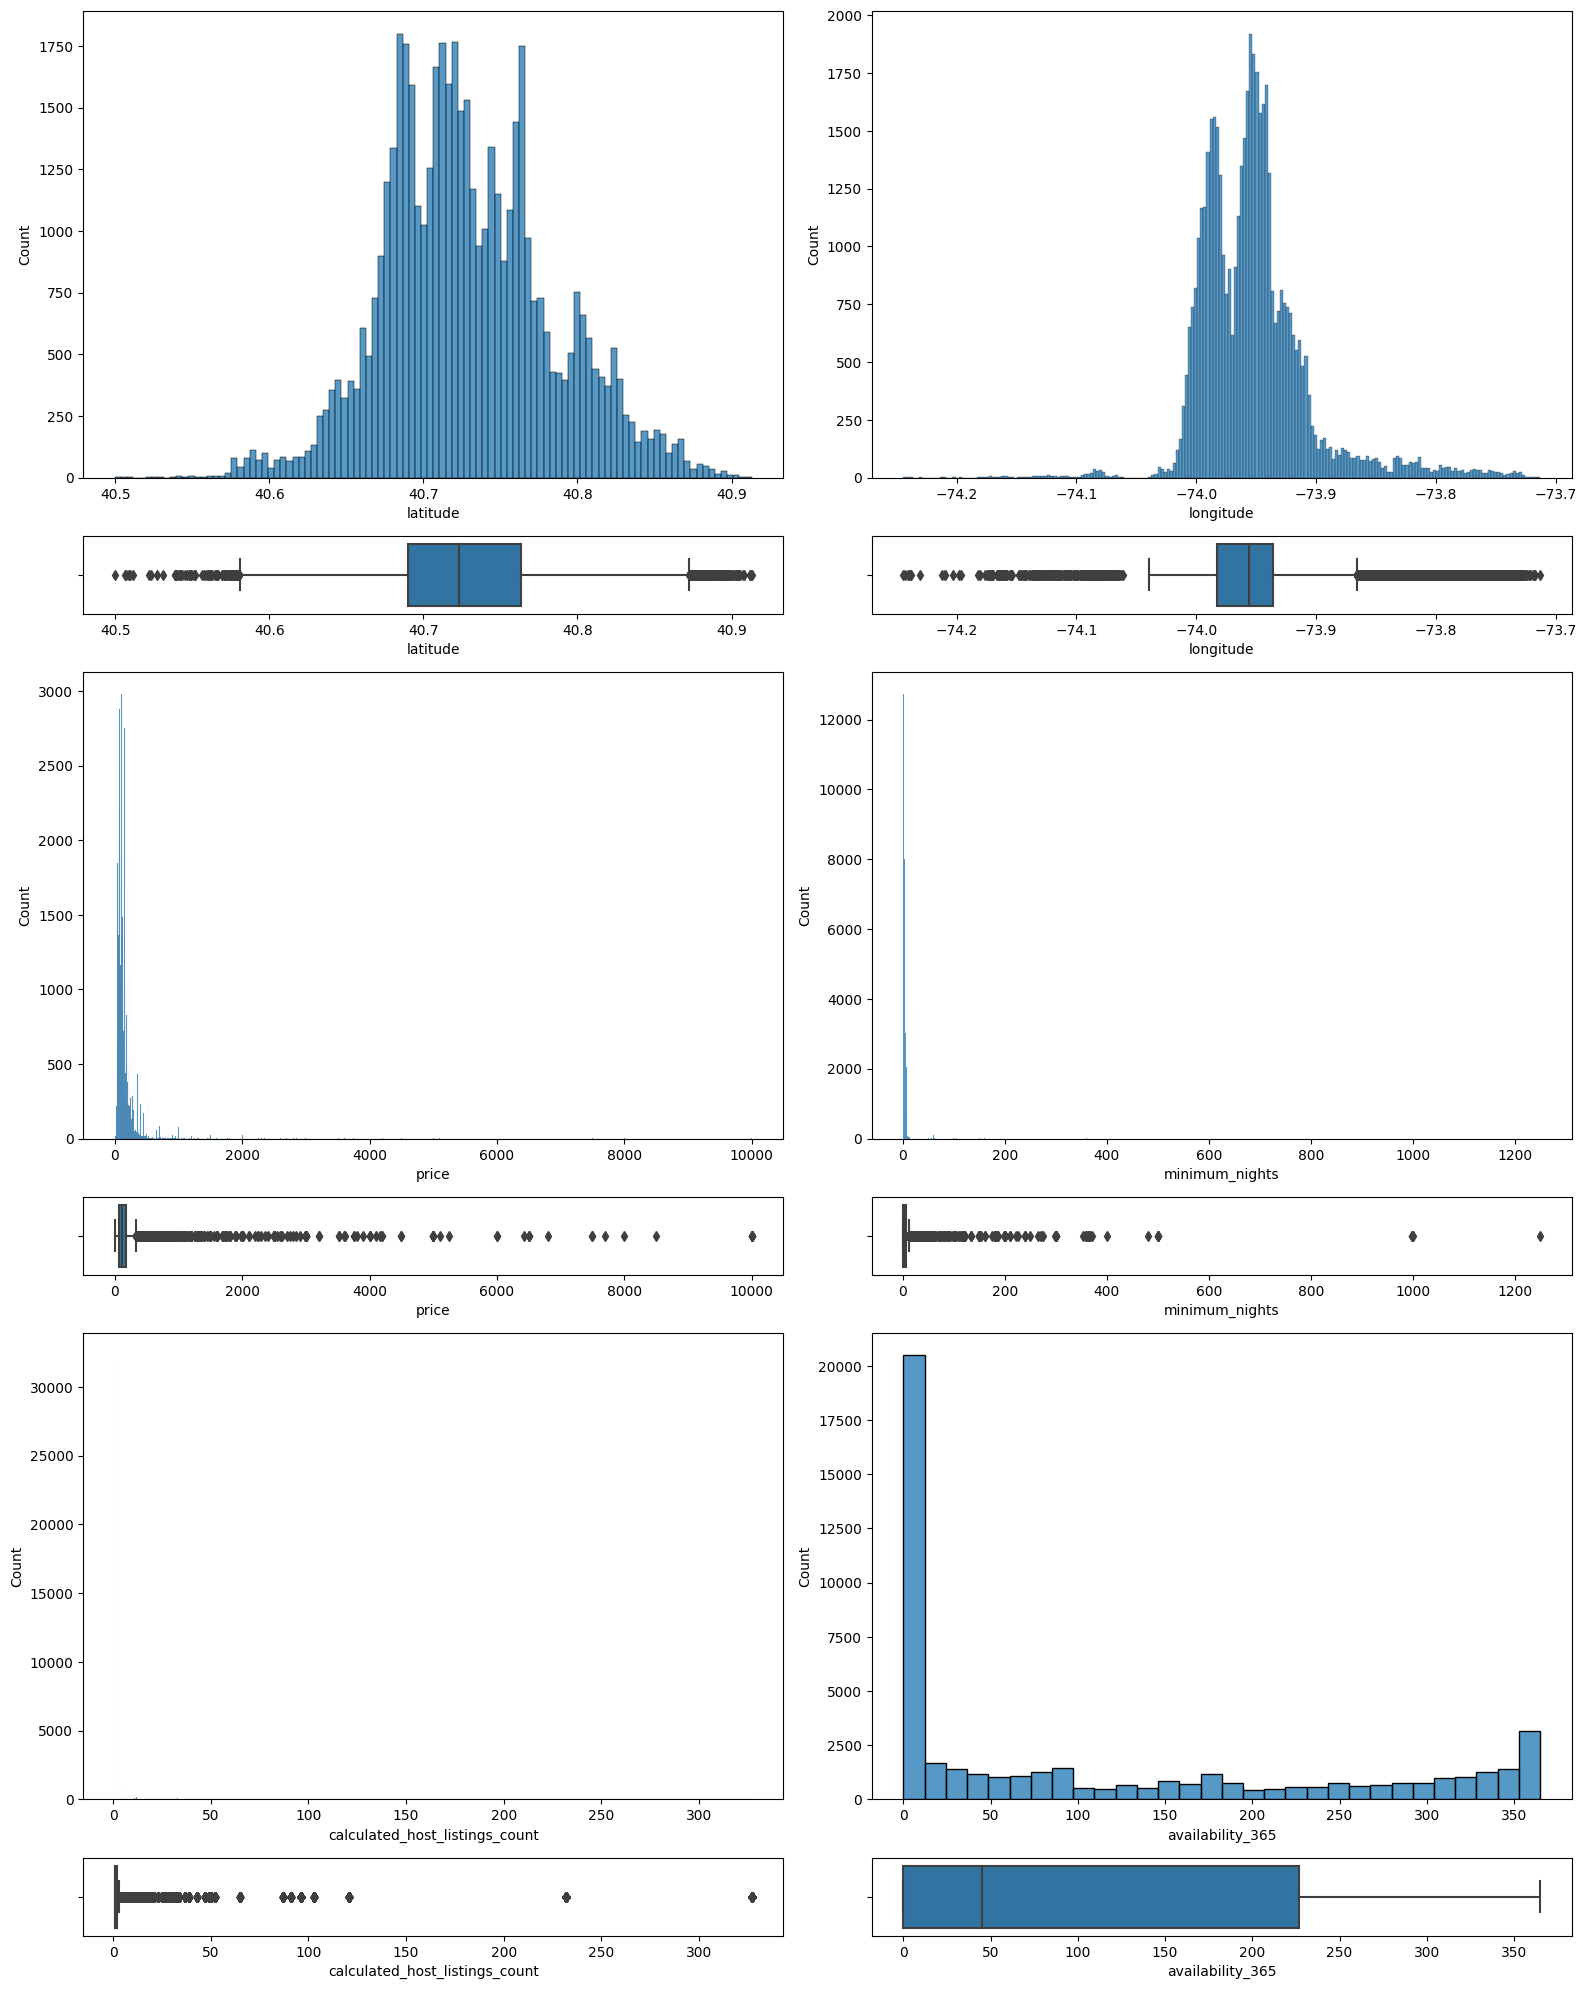

In [9]:
#Análisis sobre variables numéricas


import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 6 filas y 2 columnas
fig, axis = plt.subplots(6, 2, figsize=(16, 20), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1]})

# Gráficos de la primera sección
sns.histplot(ax=axis[0, 0], data=dataframe, x="latitude")
sns.boxplot(ax=axis[1, 0], data=dataframe, x="latitude")
sns.histplot(ax=axis[0, 1], data=dataframe, x="longitude")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="longitude")

# Gráficos de la segunda sección
sns.histplot(ax=axis[2, 0], data=dataframe, x="price")
sns.boxplot(ax=axis[3, 0], data=dataframe, x="price")
sns.histplot(ax=axis[2, 1], data=dataframe, x="minimum_nights")
sns.boxplot(ax=axis[3, 1], data=dataframe, x="minimum_nights")

# Gráficos de la tercera sección
sns.histplot(ax=axis[4, 0], data=dataframe, x="calculated_host_listings_count")
sns.boxplot(ax=axis[5, 0], data=dataframe, x="calculated_host_listings_count")
sns.histplot(ax=axis[4, 1], data=dataframe, x="availability_365")
sns.boxplot(ax=axis[5, 1], data=dataframe, x="availability_365")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Conclusiones

- Histograma y boxplot de 'latitude': El histograma muestra la distribución de las latitudes de las propiedades, mientras que el boxplot nos da información sobre la mediana, los cuartiles y los valores atípicos. La media es de aproximadamente 40.728949, lo que indica que la mayoría de las propiedades se encuentran en el hemisferio norte. La desviación estándar es de aproximadamente 0.054530, lo que indica cierta variabilidad en las ubicaciones geográficas.
- Histograma y boxplot de 'longitude': El histograma muestra la distribución de las longitudes de las propiedades, mientras que el boxplot nos da información sobre la mediana, los cuartiles y los valores atípicos. La media es de aproximadamente -73.952170, lo que indica una ubicación general en el área de Nueva York. La desviación estándar es de aproximadamente 0.046157, lo que tambien indica cierta variabilidad en las ubicaciones geográficas.
- Histograma y boxplot de 'price': El histograma muestra la distribución de los precios de las propiedades, mientras que el boxplot nos da información sobre la mediana, los cuartiles y los valores atípicos. Hay una amplia variabilidad en los precios de las propiedades. El precio mínimo es de 0, mientras que el máximo es de 10,000. La media es de aproximadamente 152.72, lo que indica que hay una distribución sesgada hacia la derecha. La desviación estándar es de aproximadamente 240.15, lo que indica una gran dispersión de precios en el conjunto de datos.
- Histograma y boxplot de 'minimum_nights': El histograma mostraría la distribución de la cantidad mínima de noches requeridas para reservar una propiedad, mientras que el boxplot proporcionaría información sobre la mediana, los cuartiles y los valores atípicos. Tiene una media de aproximadamente 7.03 y una desviación estándar de aproximadamente 20.51. Esto indica que, en promedio, se requieren alrededor de 7 noches como mínimo para reservar una propiedad. Tambien hay que tener en cuenta si estás interesado en alquileres a corto plazo o largo plazo, ya ue para uno son los  valores más bajos y para otro son los valores más altos.
- Histograma y boxplot de 'number_of_reviews': El histograma mostraría la distribución de la cantidad de revisiones para las propiedades, mientras que el boxplot proporcionaría información sobre la mediana, los cuartiles y los valores atípicos. Tiene una media de aproximadamente 23.27 y una desviación estándar de aproximadamente 44.55. Las propiedades tienen alrededor de 23 revisiones de media. Tambien hay una gran variabilidad en la cantidad de revisiones, ya que la desviación estándar es relativamente alta. La cantidad de revisiones puede ser indicativa de la popularidad, la calidad o la satisfacción de los huéspedes con las propiedades.
- Histograma y boxplot de 'availability_365': El histograma mostraría la distribución de la disponibilidad de las propiedades a lo largo del año, mientras que el boxplot proporcionaría información sobre la mediana, los cuartiles y los valores atípicos. Tiene una media de aproximadamente 112.78 y una desviación estándar de aproximadamente 131.62. Las propiedades están disponibles para reserva alrededor de 112 días al año de media. La disponibilidad de las propiedades puede influir en la demanda, los precios y la planificación de la reserva

### Paso 4: Análisis de variables multivariante

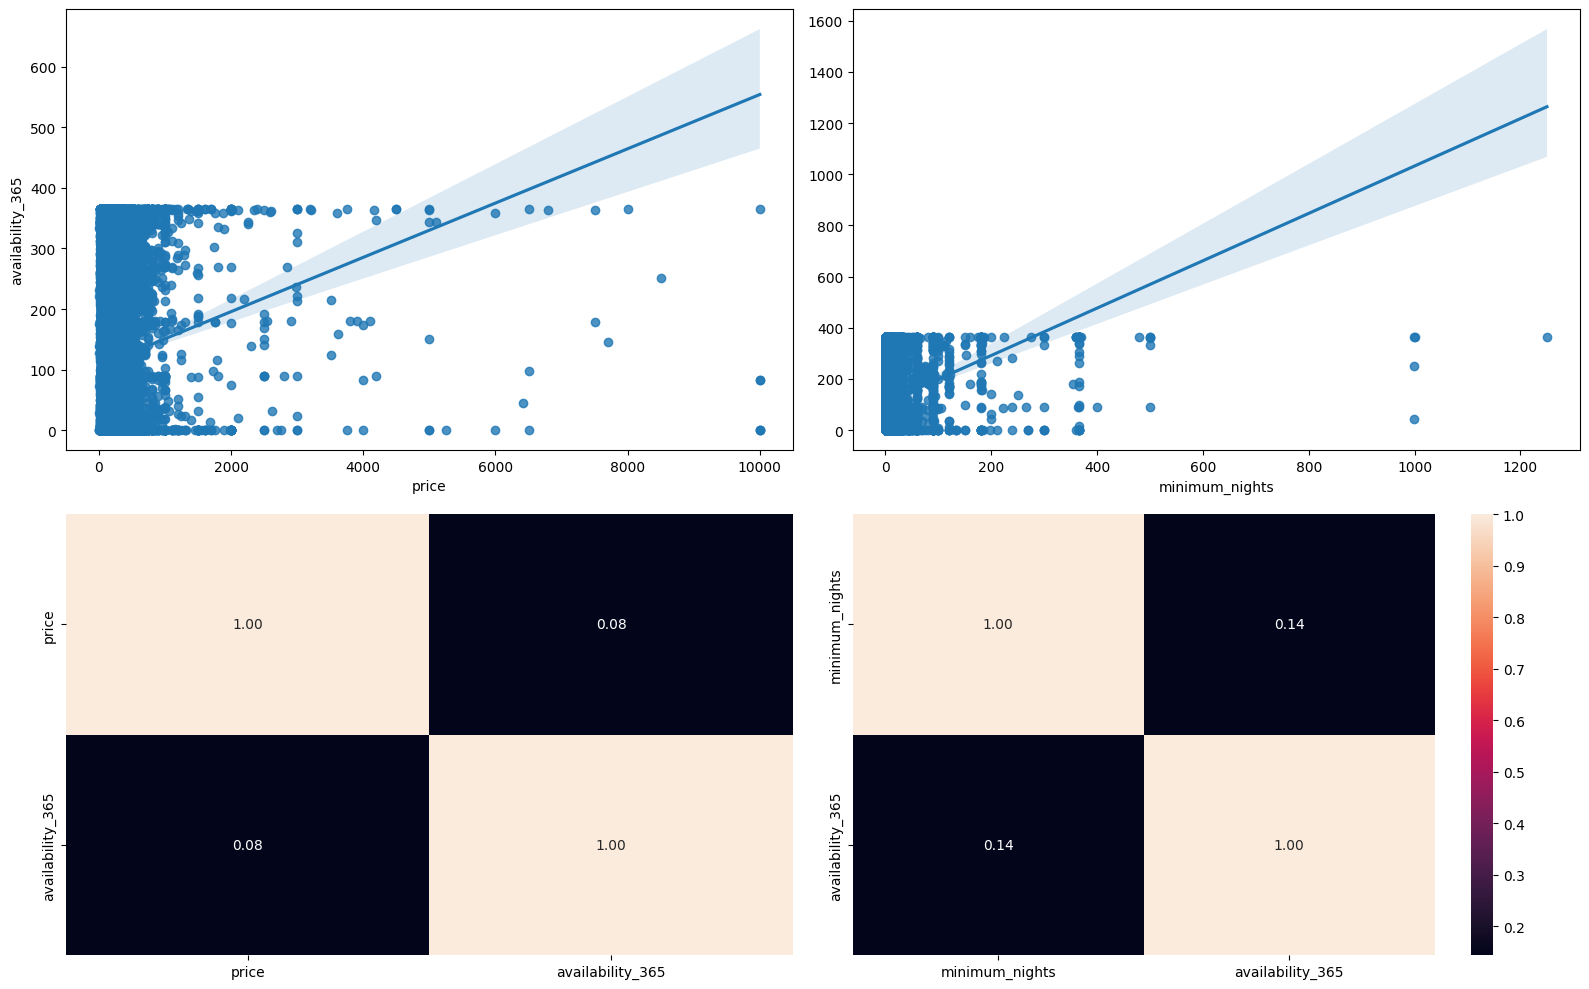

In [10]:
#Análisis numérico-numérico

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 2 filas y 2 columnas
fig, axis = plt.subplots(2, 2, figsize=(16, 10))

# Gráfico de dispersión y correlación entre "age" y "duration"
sns.regplot(ax=axis[0, 0], data=dataframe, x="price", y="availability_365")
sns.heatmap(dataframe[["price", "availability_365"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

# Gráfico de dispersión y correlación entre "campaign" y "duration"
sns.regplot(ax=axis[0, 1], data=dataframe, x="minimum_nights", y="availability_365").set(ylabel=None)
sns.heatmap(dataframe[["minimum_nights", "availability_365"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Conclusiones

- hay poca correlacion entre las variables

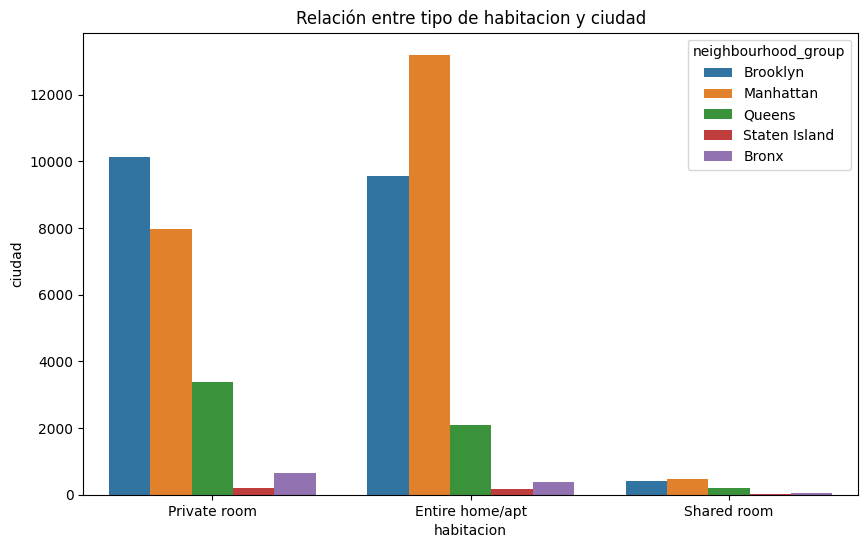

In [11]:
#Análisis categórico-categórico

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una tabla de contingencia entre las variables categóricas
contingency_table = pd.crosstab(dataframe['room_type'], dataframe['neighbourhood_group'])

# Crear gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.countplot(data=dataframe, x='room_type', hue='neighbourhood_group')

# Establecer título y etiquetas de los ejes
plt.title("Relación entre tipo de habitacion y ciudad")
plt.xlabel("habitacion")
plt.ylabel("ciudad")

# Mostrar el gráfico
plt.show()

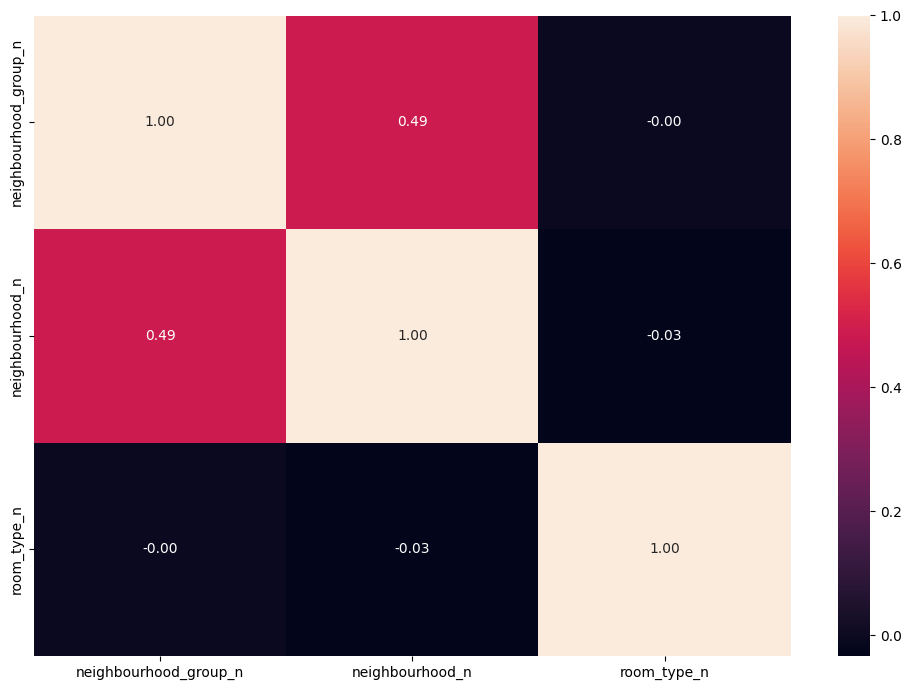

In [16]:
'''#Análisis numérico-categórico (completo y OPCIONAL)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas numéricas y categóricas para el análisis
numeric_columns = ["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]
categorical_columns = ["neighbourhood_group", "neighbourhood", "room_type"]

# Calcular la matriz de correlación entre las variables numéricas
corr_matrix_numeric = dataframe[numeric_columns].corr()

# Calcular la matriz de correlación entre las variables categóricas
corr_matrix_categorical = dataframe[categorical_columns].apply(lambda x: pd.factorize(x)[0]).corr()

# Unir ambas matrices de correlación
corr_matrix_combined = pd.concat([corr_matrix_numeric, corr_matrix_categorical], axis=1)

# Crear el mapa de calor de correlación para todas las variables
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix_combined, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables numéricas y categóricas")
plt.tight_layout()
plt.show()
'''

#Análisis categórico a numerico (completo y OPCIONAL) con facotorize

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
dataframe_copy = dataframe.copy()

# Convert categorical columns to numerical using factorize
dataframe_copy['neighbourhood_group_n'] = pd.factorize(dataframe_copy['neighbourhood_group'])[0]
dataframe_copy['neighbourhood_n'] = pd.factorize(dataframe_copy['neighbourhood'])[0]
dataframe_copy['room_type_n'] = pd.factorize(dataframe_copy['room_type'])[0]


# Plot the correlation heatmap
fig, axis = plt.subplots(figsize=(10, 7))
sns.heatmap(dataframe_copy[['neighbourhood_group_n', 'neighbourhood_n', 'room_type_n']].corr(), annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

sns.heatmap(dataframe_copy[['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n', 'y_n']].corr(), annot=True, fmt=".2f")


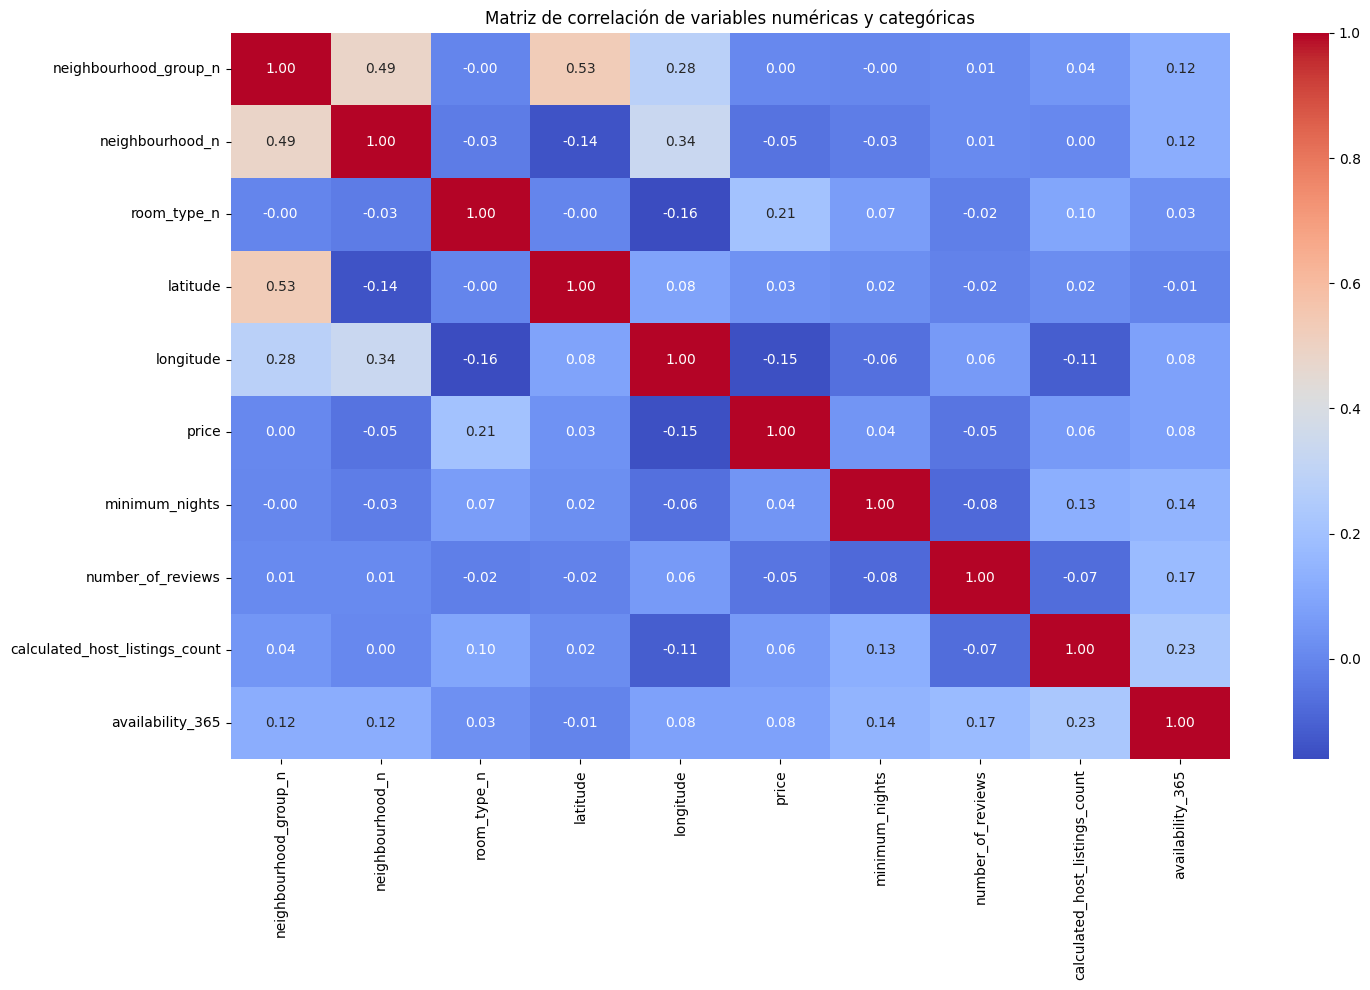

In [18]:
#heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas y categóricas para el análisis
numeric_columns = ["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]
categorical_columns = ["neighbourhood_group", "neighbourhood", "room_type"]

# Calcular la matriz de correlación entre las variables numéricas
corr_matrix_numeric = dataframe[numeric_columns].corr()

# Calcular la matriz de correlación entre las variables categóricas
corr_matrix_categorical = dataframe[categorical_columns].apply(lambda x: pd.factorize(x)[0]).corr()

# Unir ambas matrices de correlación
corr_matrix_combined = pd.concat([corr_matrix_numeric, corr_matrix_categorical], axis=1)

# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
dataframe_copy = dataframe.copy()

# Convert categorical columns to numerical using factorize
dataframe_copy['neighbourhood_group_n'] = pd.factorize(dataframe_copy['neighbourhood_group'])[0]
dataframe_copy['neighbourhood_n'] = pd.factorize(dataframe_copy['neighbourhood'])[0]
dataframe_copy['room_type_n'] = pd.factorize(dataframe_copy['room_type'])[0]

# Plot the correlation heatmap for both numerical and categorical columns
plt.figure(figsize=(15, 10))
sns.heatmap(dataframe_copy[['neighbourhood_group_n', 'neighbourhood_n', 'room_type_n'] + numeric_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables numéricas y categóricas")
plt.tight_layout()
plt.show()

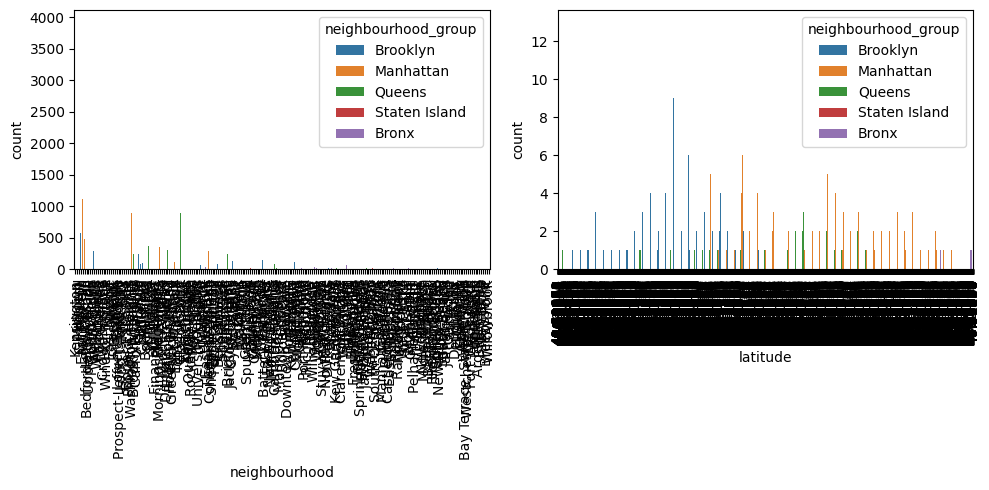

In [22]:
#Analizamos las variables mas altas

fig, axis = plt.subplots(figsize=(10, 5), ncols=2)

sns.countplot(ax=axis[0], data=dataframe, x="neighbourhood", hue="neighbourhood_group")
axis[0].tick_params(axis='x', rotation=90)
sns.countplot(ax=axis[1], data=dataframe, x="latitude", hue="neighbourhood_group")
axis[1].tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()

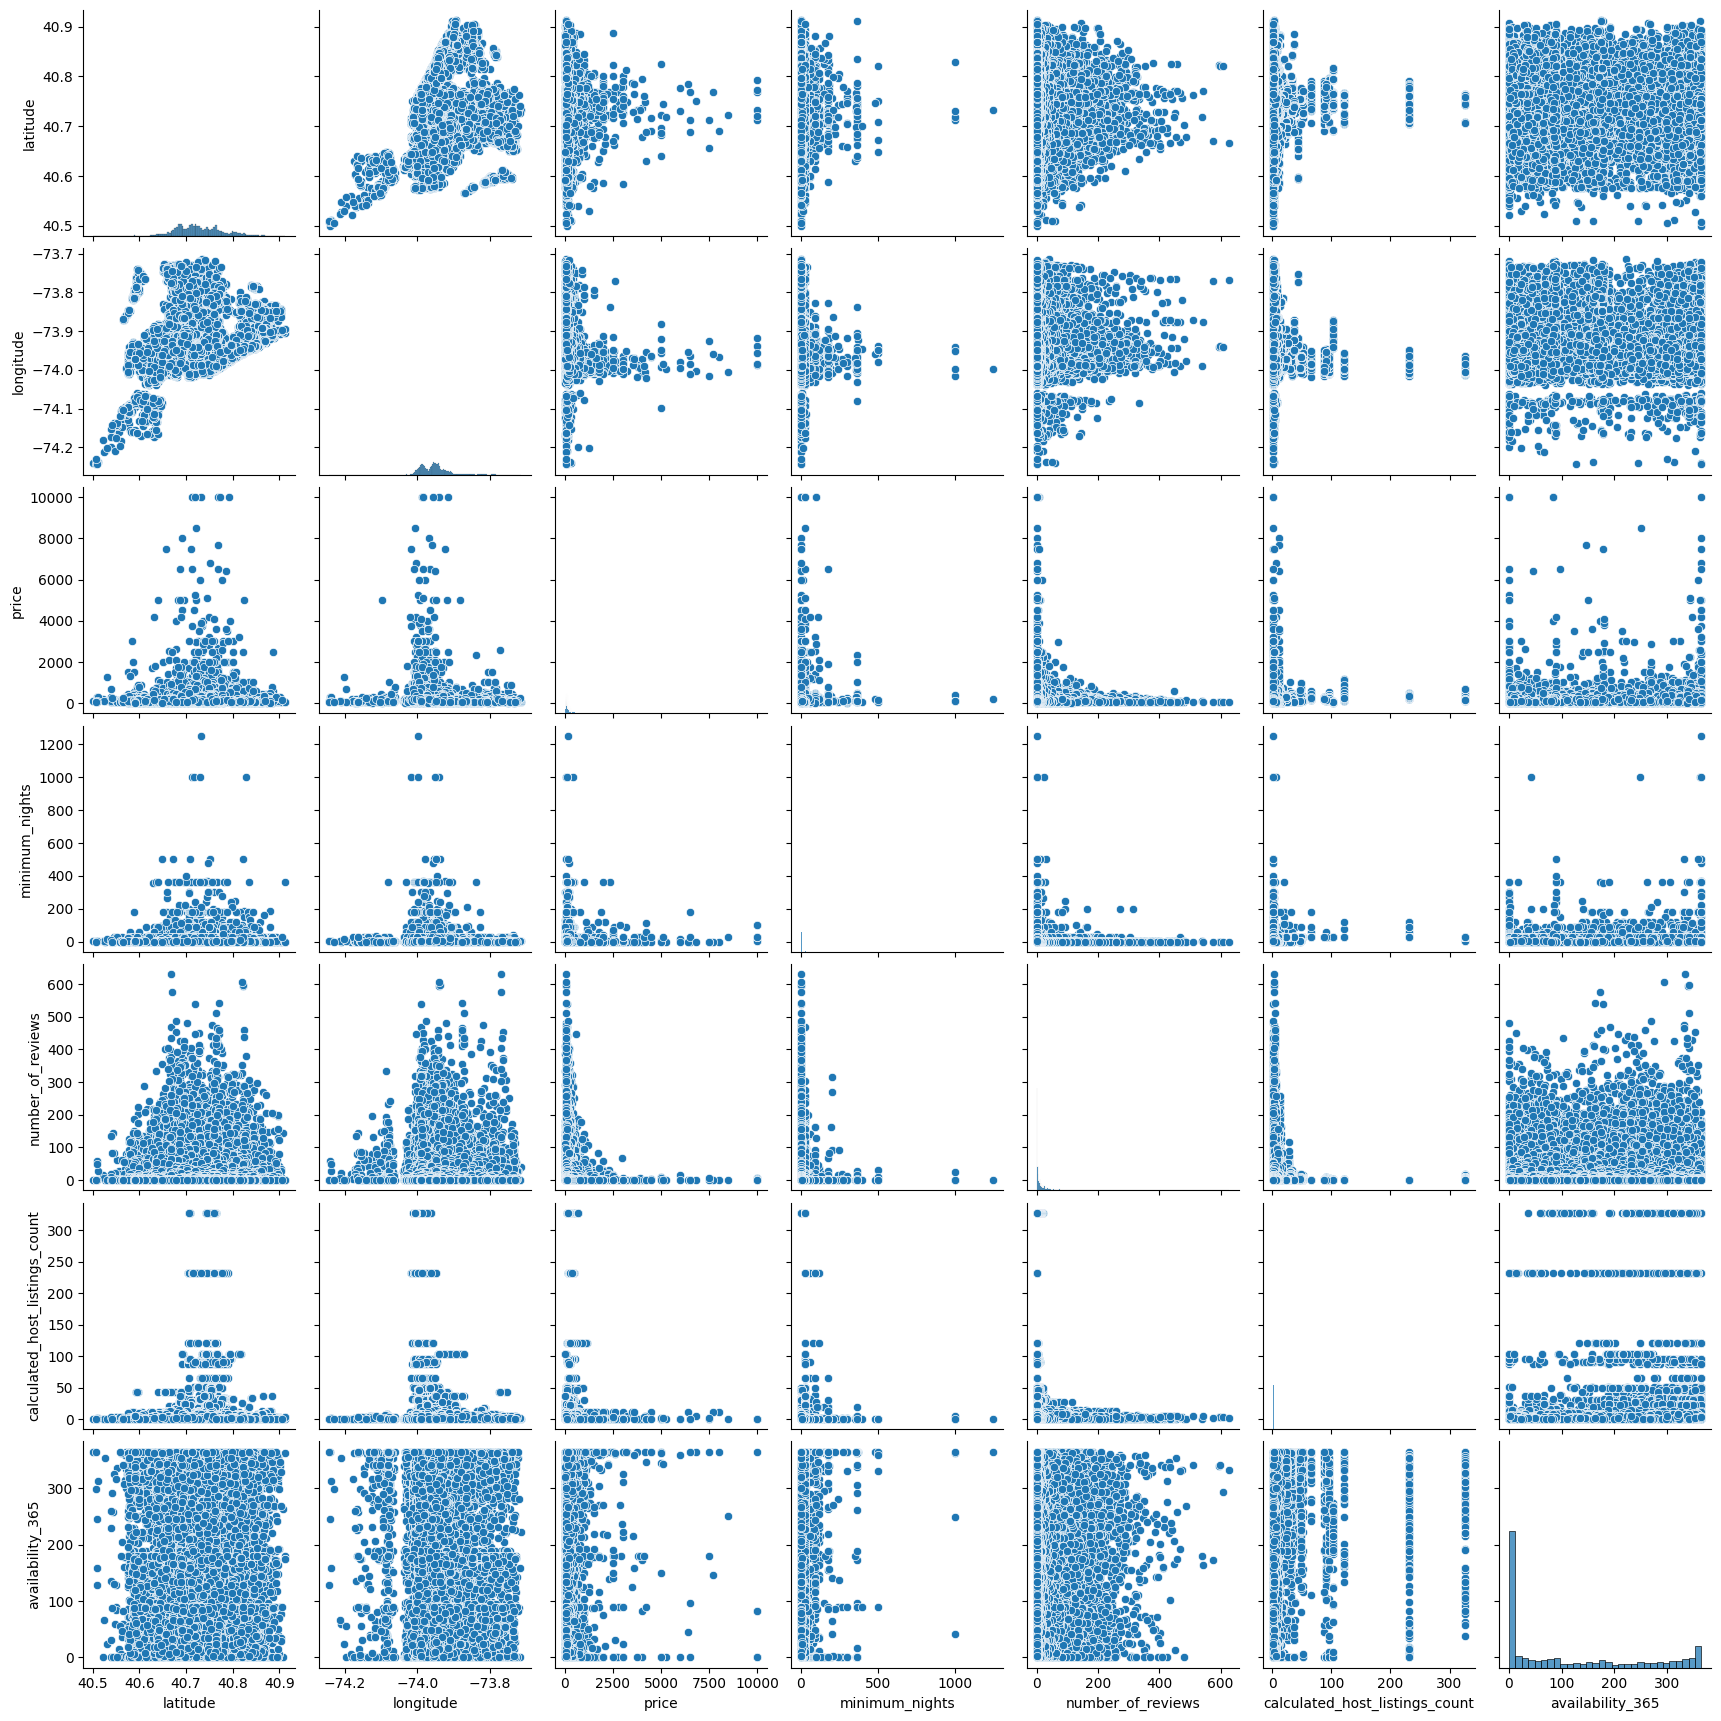

In [14]:
#dibujar el pairplot

sns.pairplot(data = dataframe)

-Análisis de outliers

In [23]:
#análisis descriptivo para outliers

dataframe.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


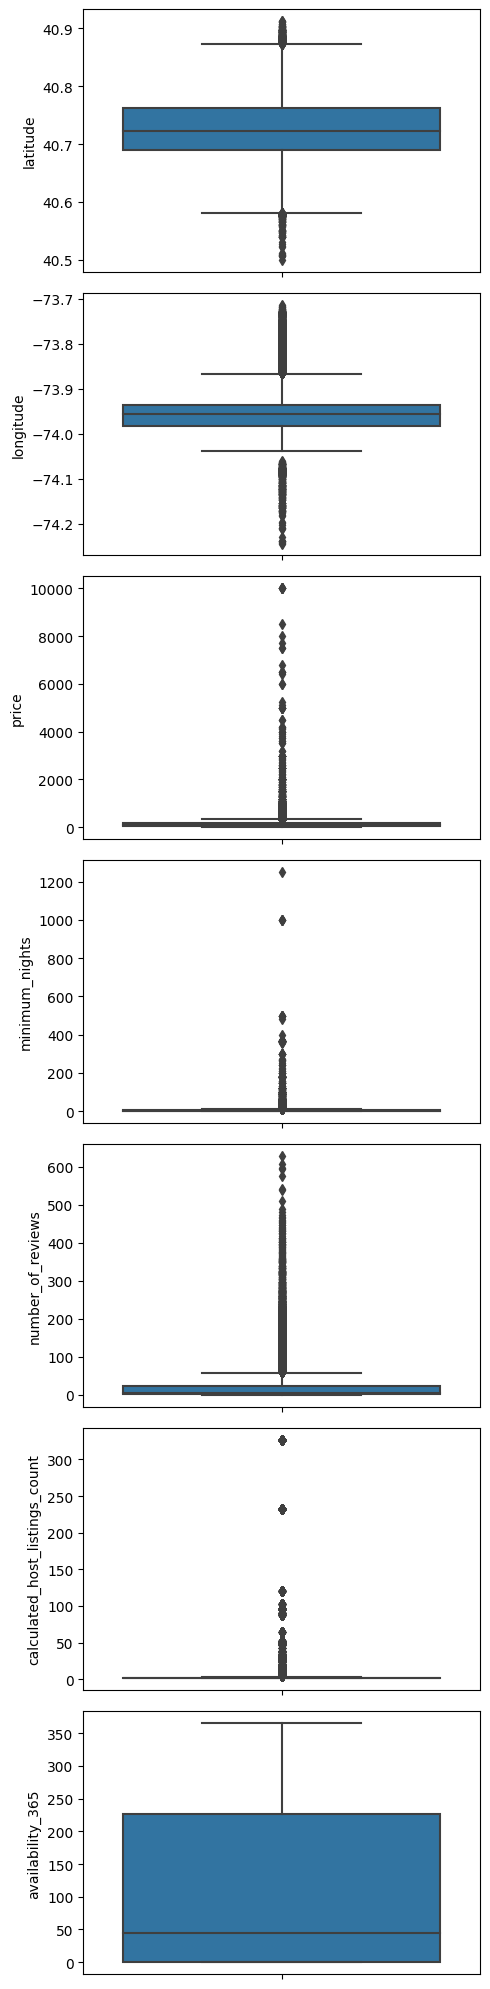

In [26]:
#Dibujar los diagramas de cajas de las variables

fig, axes = plt.subplots(7, 1, figsize=(5, 20))

sns.boxplot(ax=axes[0], data=dataframe, y="latitude")
sns.boxplot(ax=axes[1], data=dataframe, y="longitude")
sns.boxplot(ax=axes[2], data=dataframe, y="price")
sns.boxplot(ax=axes[3], data=dataframe, y="minimum_nights")
sns.boxplot(ax=axes[4], data=dataframe, y="number_of_reviews")
sns.boxplot(ax=axes[5], data=dataframe, y="calculated_host_listings_count")
sns.boxplot(ax=axes[6], data=dataframe, y="availability_365")

plt.tight_layout()
plt.show()

In [27]:
#eliminar outliers latitude

latitude_stats = dataframe["latitude"].describe()
print(latitude_stats)


fare_iqr = latitude_stats["75%"] - latitude_stats["25%"]
upper_limit = latitude_stats["75%"] + 1.5 * fare_iqr
lower_limit = latitude_stats["25%"] - 1.5 * fare_iqr

print(f"\n- Los límites superior e inferior para la búsqueda de outliers en latitude son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

count    48895.000000
mean        40.728949
std          0.054530
min         40.499790
25%         40.690100
50%         40.723070
75%         40.763115
max         40.913060
Name: latitude, dtype: float64

- Los límites superior e inferior para la búsqueda de outliers en latitude son 40.87 y 40.58, con un rango intercuartílico de 0.07


In [28]:
#eliminar outliers longitude

longitude_stats = dataframe["longitude"].describe()
print(longitude_stats)


fare_iqr = longitude_stats["75%"] - longitude_stats["25%"]
upper_limit = longitude_stats["75%"] + 1.5 * fare_iqr
lower_limit = longitude_stats["25%"] - 1.5 * fare_iqr

print(f"\n- Los límites superior e inferior para la búsqueda de outliers en longitude son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

count    48895.000000
mean       -73.952170
std          0.046157
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936275
max        -73.712990
Name: longitude, dtype: float64

- Los límites superior e inferior para la búsqueda de outliers en longitude son -73.87 y -74.05, con un rango intercuartílico de 0.05


In [29]:
#eliminar outliers price

price_stats = dataframe["price"].describe()
print(price_stats)


fare_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * fare_iqr
lower_limit = price_stats["25%"] - 1.5 * fare_iqr

print(f"\n- Los límites superior e inferior para la búsqueda de outliers en price son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

- Los límites superior e inferior para la búsqueda de outliers en price son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [30]:
#Análisis de valores faltantes

dataframe.isnull().sum()


neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [31]:
dataframe.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [32]:
#escalado de valores (feature scaling)


#Normalización

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_variables = ["price", "number_of_reviews", "availability_365"]


norm_features = scaler.fit_transform(dataframe[num_variables])

dataframe_norm = pd.DataFrame(norm_features, index = dataframe.index, columns = num_variables)
dataframe_norm.head()


,price,number_of_reviews,availability_365
0,-0.015493,-0.320414,1.916250
1,0.300974,0.487665,1.840275
2,-0.011329,-0.522433,1.916250
3,-0.265335,5.538156,0.617065
4,-0.302811,-0.320414,-0.856865


In [33]:
#Escalado Mínimo-Máximo

from sklearn.preprocessing import MinMaxScaler

num_variables = ["price", "number_of_reviews", "availability_365"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(dataframe[num_variables])
dataframe_scal = pd.DataFrame(scal_features, index = dataframe.index, columns = num_variables)
dataframe_scal.head()

,price,number_of_reviews,availability_365
0,0.0149,0.014308,1.000000
1,0.0225,0.071542,0.972603
2,0.0150,0.000000,1.000000
3,0.0089,0.429253,0.531507
4,0.0080,0.014308,0.000000


In [34]:
#selección de características (feature selection). seleccionar las características (variables) más relevantes
#de nuestro conjunto de datos para usarlas en la construcción de un modelo de Machine Learning

import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = dataframe_scal.drop("price", axis=1)
y = dataframe_scal["price"]

# Convertir las etiquetas continuas en etiquetas discretas
y_discrete = pd.cut(y, bins=3, labels=False)

X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.2, random_state=42)
selection_model = SelectKBest(chi2, k=2)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

# Ajustar el LabelEncoder en las etiquetas discretas
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

# Convertir las etiquetas discretas de vuelta a continuas
y_train_continuous = label_encoder.inverse_transform(y_train)
y_test_continuous = label_encoder.inverse_transform(y_test)

X_train_sel["price"] = y_train_continuous
X_test_sel["price"] = y_test_continuous

train_file_path = r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\013-PROYECTO1-machine-learning-python-template-main\src\clean_train.csv"
test_file_path = r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\013-PROYECTO1-machine-learning-python-template-main\src\test_train.csv"

X_train_sel.to_csv(train_file_path, index=False)
X_test_sel.to_csv(test_file_path, index=False)

YA ESTAMOS PREPARADOS PARA ENTRENAR EL MODELO!! :D